## Day 3 – SQL via Python: NYC School Data Exploration
 **Objective**
Use Python and SQL together to explore real-world education data. we'll connect to a PostgreSQL database, write SQL queries, analyze school-level insights, and present your work in a notebook.

### Step 1: Import Libraries

In [258]:
#pip install psycopg2-binary
#!pip install sqlalchemy
#!pip install pandas

In [259]:
# Import necessary libraries
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### Step 2: Connect to the Database

In [260]:
# DB connection setup using hardcoded credentials (for onboarding only)
conn = psycopg2.connect(
    dbname="neondb",            # Database name
    user="neondb_owner",
    password= "a9Am7Yy5r9_T7h4OF2GN",
    host="ep-falling-glitter-a5m0j5gk-pooler.us-east-2.aws.neon.tech",
    port="5432",                # Default PostgreSQL port
    sslmode="require"
)
cursor = conn.cursor()
print("✅ Connected to database using psycopg2")


✅ Connected to database using psycopg2


# Step 3: Explore Database Structure


## 🔍  Preview Data

In [261]:
# Preview first few rows of each table
print("=== School safety report Preview ===")
query = "SELECT * FROM nyc_schools.school_safety_report LIMIT 5;"
df_safety = pd.read_sql(query, conn)
display(df_safety.head()) # few rows overveiw

# column name overview
display(df_safety.columns)

=== School safety report Preview ===


,school_year,building_code,dbn,location_name,location_code,address,borough,geographical_district_code,register,building_name,...,postcode,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,_schools
0,2015-16,K006,17K006,P.S. 006,K006,43 SNYDER AVENUE,K,17.0,712,,...,11226.0,40.648590,-73.957138,14.0,40.0,794.0,3117230.0,3.051030e+09,Erasmus ...,1
1,2015-16,K005,16K005,P.S. 005 Dr. Ronald Mcnair,K005,820 HANCOCK STREET,K,16.0,231,,...,11233.0,40.685695,-73.922463,3.0,41.0,377.0,3039906.0,3.014900e+09,Stuyvesant Heights ...,1
2,2015-16,K003,13K003,P.S. 003 The Bedford Village,K003,50 JEFFERSON AVENUE,K,13.0,450,,...,11216.0,40.682663,-73.955338,3.0,36.0,227.0,3057406.0,3.019980e+09,Clinton Hill ...,1
3,2015-16,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17.0,374,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...,3
4,2015-16,K002,84K704,EXPLORE CHARTER SCHOOL(BS),K704,655 PARKSIDE AVENUE,K,17.0,529,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...,3


Index(['school_year', 'building_code', 'dbn', 'location_name', 'location_code',
       'address', 'borough', 'geographical_district_code', 'register',
       'building_name', 'num_schools', 'schools_in_building', 'major_n',
       'oth_n', 'nocrim_n', 'prop_n', 'vio_n', 'engroupa', 'rangea',
       'avgofmajor_n', 'avgofoth_n', 'avgofnocrim_n', 'avgofprop_n',
       'avgofvio_n', 'borough_name', 'postcode', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract', 'bin', 'bbl',
       'nta', '_schools'],
      dtype='object')

In [262]:
print("=== School Demographics Preview ===")
query = "SELECT * FROM nyc_schools.school_demographics LIMIT 5;"
df_demographics = pd.read_sql(query, conn)

display(df_demographics.head())

# columns name overview
display(df_demographics.columns)  #  list(df_demographics) 

=== School Demographics Preview ===


,dbn,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140,57.6,103,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4


Index(['dbn', 'Name', 'schoolyear', 'fl_percent', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
       'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num',
       'black_per', 'hispanic_num', 'hispanic_per', 'white_num', 'white_per',
       'male_num', 'male_per', 'female_num', 'female_per'],
      dtype='object')

In [263]:
print("\n=== High School Directory Preview ===")
query = "SELECT * FROM nyc_schools.high_school_directory LIMIT 5;"
df_directory = pd.read_sql(query, conn)
display(df_directory.head())  # few rows overview

# column name overview
display(list(df_directory))


=== High School Directory Preview ===


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,number_programs,Location 1,Community Board,Council District,Census Tract,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,None,None,...,1,"{'latitude': '40.601989336', 'longitude': '-73...",14,31,100802,20529,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,None,None,...,1,"{'latitude': '40.593593811', 'longitude': '-73...",13,47,306,17616,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,None,None,...,1,"{'latitude': '40.692133704', 'longitude': '-73...",3,36,291,18181,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,None,None,...,1,"{'latitude': '40.822303765', 'longitude': '-73...",9,18,16,11611,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,None,None,...,6,"{'latitude': '40.773670507', 'longitude': '-73...",7,6,151,12420,20,4,19,12


['dbn',
 'school_name',
 'borough',
 'building_code',
 'phone_number',
 'fax_number',
 'grade_span_min',
 'grade_span_max',
 'expgrade_span_min',
 'expgrade_span_max',
 'start_time',
 'end_time',
 'priority01',
 'priority02',
 'priority03',
 'priority04',
 'priority05',
 'priority06',
 'priority07',
 'priority08',
 'priority09',
 'priority10',
 'location',
 'phone_number2',
 'school_email',
 'website',
 'subway',
 'bus',
 'grades2018',
 'finalgrades',
 'total_students',
 'extracurricular_activities',
 'school_sports',
 'attendance_rate',
 'pct_stu_enough_variety',
 'pct_stu_safe',
 'school_accessibility_description',
 'directions1',
 'requirement1',
 'requirement2',
 'requirement3',
 'requirement4',
 'requirement5',
 'program1',
 'code1',
 'interest1',
 'method1',
 'seats9ge1',
 'grade9gefilledflag1',
 'grade9geapplicants1',
 'seats9swd1',
 'grade9swdfilledflag1',
 'grade9swdapplicants1',
 'campus_name',
 'building_borough',
 'building_location',
 'latitude',
 'longitude',
 'community_

## ✅ Task Queries Below

**###🧮 School Distribution**

In [264]:
### Question 1: How many schools are there in each borough?

# **Approach:** Using SQL GROUP BY to count schools per borough from the high school directory table.

query_q1= """
SELECT 
    borough, 
    COUNT(*) AS school_count
FROM nyc_schools.high_school_directory
GROUP BY borough
ORDER BY school_count DESC;
"""
# Execute query and display results
df_q1 = pd.read_sql(query_q1, conn)

print("Schools per Borough:")
display(df_q1)
print(f"\nTotal schools across all boroughs: {df_q1['school_count'].sum()}")

Schools per Borough:


,borough,school_count
0,Brooklyn,121
1,Bronx,118
2,Manhattan,106
3,Queens,80
4,Staten Island,10



Total schools across all boroughs: 435


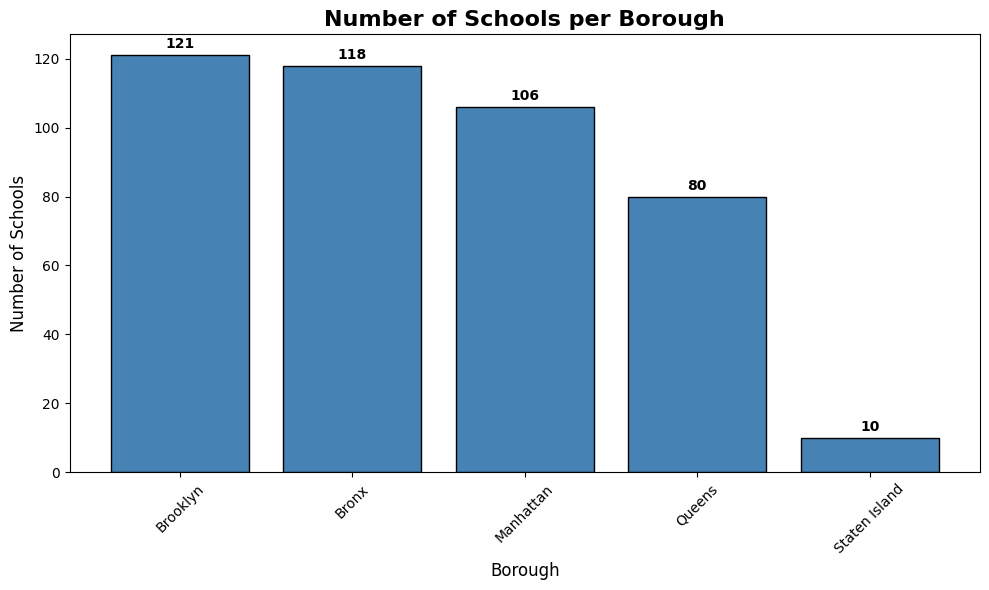

✅ Chart saved


In [265]:
# visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_q1['borough'], df_q1['school_count'], color='steelblue', edgecolor='black')
plt.title('Number of Schools per Borough', fontsize=16, fontweight='bold')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for i, (borough, count) in enumerate(zip(df_q1['borough'], df_q1['school_count'])):
    plt.text(i, count + 2, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('schools_per_borough_sql.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Chart saved")

**###🎓 Language Learners**

In [266]:
# Query 2 — (option A from school_safety_report)

# What is the average % of English Language Learners (ELL) per borough?

query_q2 = """
SELECT 
    rd.borough,
    AVG(sd.ell_percent) AS avg_ell_percent
FROM 
    nyc_schools.school_demographics sd
JOIN 
    nyc_schools.school_safety_report rd
ON 
    sd.dbn = rd.dbn
GROUP BY 
    rd.borough
ORDER BY 
    avg_ell_percent DESC;
"""
# Execute query and display results
df_q2 = pd.read_sql(query_q2, conn)

print("Average % of English Language Learners (ELL) per Borough: Answer 1")
df_q2


Average % of English Language Learners (ELL) per Borough: Answer 1


,borough,avg_ell_percent
0,M,11.870539


In [267]:
# Query 2 —Language Learners (option b) from high_school_directory

# What is the average % of English Language Learners (ELL) per borough?

query_q2b = """
SELECT 
    hd.borough,
    AVG(sd.ell_percent) AS avg_ell_percent
FROM 
    nyc_schools.school_demographics sd
JOIN 
    nyc_schools.high_school_directory hd
ON 
    sd.dbn = hd.dbn
GROUP BY 
    hd.borough
ORDER BY 
    avg_ell_percent DESC;
"""
# Execute query and display results
df_q2b = pd.read_sql(query_q2b, conn)

print("Average % of English Language Learners (ELL) per Borough: Answer 2")
df_q2b


Average % of English Language Learners (ELL) per Borough: Answer 2


,borough,avg_ell_percent
0,Manhattan,7.5725


In [268]:
# To double check Task 2 using python synthax

# Merge the dataframes on 'dbn'
merged_demo_safety = pd.merge(df_demographics, df_safety, on="dbn")

# Group by borough and calculate mean ELL percent
result = merged_demo_safety .groupby("borough")["ell_percent"].mean()

print(result)

Series([], Name: ell_percent, dtype: float64)


In [269]:
# Merge the dataframes on 'dbn'
merged_demo_dir = pd.merge(df_demographics, df_directory, on="dbn")

# Group by borough and calculate mean ELL percent
result = merged_demo_dir.groupby("borough")["ell_percent"].mean()

print(result)

Series([], Name: ell_percent, dtype: float64)


In [270]:
print(df_directory['borough'].unique())
print(df_demographics['dbn'].nunique())
print(df_directory['dbn'].nunique())
print(df_safety['dbn'].nunique())

['Queens' 'Brooklyn' 'Bronx' 'Manhattan']
1
5
5


**###🔗School supporting special needs**

Using the data from the school demographics and high school directory, write a query to find the top 3 schools in each borough with the highest percentage of special education students (sped_percent)

In [271]:
# SQL query to find top 3 schools with highest SPED % per borough
query_q3 = """
WITH ranked_schools AS (
    SELECT 
        sd.dbn,
        hsd.school_name,
        hsd.borough,
        sd.sped_percent,
        RANK() OVER (PARTITION BY hsd.borough ORDER BY sd.sped_percent DESC) AS rank
    FROM nyc_schools.school_demographics sd
    JOIN nyc_schools.high_school_directory hsd 
    ON sd.dbn = hsd.dbn
    WHERE sd.sped_percent IS NOT NULL
    
)
SELECT 
    borough,
    rank,
    school_name,
    dbn,
    sped_percent AS special_ed_percent
FROM ranked_schools
WHERE rank <= 3
ORDER BY borough, rank;
"""

# Execute query
top_sped_schools = pd.read_sql(query_q3, conn)

print("Top 3 Schools with Highest Special Education % per Borough:")
display(top_sped_schools)

Top 3 Schools with Highest Special Education % per Borough:


,borough,rank,school_name,dbn,special_ed_percent
0,Manhattan,1,East Side Community School,01M450,28.8
1,Manhattan,2,East Side Community School,01M450,27.7
2,Manhattan,3,East Side Community School,01M450,26.7


## 🧠 Insights



1. **Brooklyn and the Bronx dominate school distribution:**  
   Brooklyn has the highest number of schools (121), followed by the Bronx (118) and Manhattan (106). Queens (80) and Staten Island (10) have significantly fewer, reflecting differences in population density and urban distribution.

2. **English Language Learner (ELL) data inconsistency:**  
   The two ELL summaries indicate potential inconsistencies in the dataset or filters used.  
   - Answer 1 (`borough = M`) gives an average of **11.87%**,  
   - Answer 2 (`borough = Manhattan`) gives an average of **7.57%**.  
   This suggests that ELL data may need cleaning or borough codes translated into full names before reliable comparison.

3. **Special Education (SPED) analysis reveals duplication issue:**  
   The same school, *East Side Community School (01M450)*, appears multiple times with slightly different percentages (28.8%, 27.7%, 26.7).  
   This likely indicates either duplicated rows (perhaps from multiple years or grade levels) or that the ranking query needs distinct filtering.  
   It’s worth revisiting the `JOIN` condition or applying `DISTINCT` on school names to correct the redundancy.

4. **Overall insights for improvement:**  
   - The data structure is rich but not fully standardized (borough codes like “M” vs. “Manhattan”).  
   - Cleaning and normalizing identifiers will enable better borough-level comparisons.  
   - Verifying uniqueness of school entries (e.g., `DISTINCT dbn`) is crucial before deeper demographic analysis.
